In [187]:
import pubchempy as pcp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pybel
import openbabel as ob
from rdkit import Chem 
from rdkit.Chem import FragmentCatalog
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import AllChem
%matplotlib inline
import logging
logging.basicConfig(filename='example.log', filemode='w', level=logging.DEBUG)

def Database():
    """compile data sets into a data library, the output will be a DataFrame"""
    data_1 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=3)
    data = data_1[['Name','Family', 'FP Exp.', 'CN Exp.']]
    result_1 = data.drop(index=0)
    result_1.reset_index(drop=True, inplace=True)
    data_2 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=4)
    result_2 = data_2.loc[: , '-H': 'aaCa']
    result = pd.concat([result_1, result_2], axis=1)
    return result

df=Database()
g=df.loc[:,'-H':'aaCa']
col=g.columns
dcol=pd.DataFrame(col)

def wrapping(CID):
    smiles=SMILES(CID)
    loc=func_group(CID)
    graph=graphme(smiles)
    counter=func_groups(smiles)
    print(smiles)
    print(counter)
    print(loc)
    print(graph)
    return 
    
def SMILES(CID):
    """
    Description:
    This function produces a SMILES from CID number input 
    """
    #CID number can be gained from URL:https://pubchem.ncbi.nlm.nih.gov/
    c = pcp.Compound.from_cid(CID)
    FORMULA=c.molecular_formula
    SMILES=c.canonical_smiles
    
    return SMILES
    
def loc(CID):
    """
    Description:
    This function tells the position of substructure.
    The length of the outer tuple is the number of matched substructures, 
    while the integers in the inner tuple are the indices of the molecule's atoms.

    """
    c = pcp.Compound.from_cid(CID) 
    inchi=c.inchi
    smiles=c.isomeric_smiles
    mol=Chem.MolFromInchi(inchi)
    result=Chem.MolFromSmiles(smiles)
    loc=Chem.Mol.GetSubstructMatches(mol,result,uniquify=True)
    
    return loc

def func_groups(SMILES):
    import os 
    import rdkit
    import collections
    from collections import Counter
    
    fName=os.path.join(rdkit.RDConfig.RDDataDir,'FunctionalGroups.txt')
    from rdkit.Chem import FragmentCatalog
    fparams = FragmentCatalog.FragCatParams(1,6,fName)
    fparams.GetNumFuncGroups()

    fcat=FragmentCatalog.FragCatalog(fparams)
    fcgen=FragmentCatalog.FragCatGenerator()
    m = Chem.MolFromSmiles(smiles)
    num=fcgen.AddFragsFromMol(m,fcat)
    
    ls=[]
    lf=[]
    for x in list(range(num)):
        des=fcat.GetEntryDescription(x)
        ls.append(des)

    counter=Counter(ls)
    df_counter = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    return df_counter
    
def graphme(SMILES):
    """
    Description:
    This function generates a visualization of the Gasteiger partial charges.
    """
    mol = Chem.MolFromSmiles(SMILES)
    AllChem.ComputeGasteigerCharges(mol)
    contribs = [float(mol.GetAtomWithIdx(i).GetProp('_GasteigerCharge')) for i in range(mol.GetNumAtoms())]
    fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)
    return fig

CS(=O)(=O)C1=CC=C(C=C1)C2=C(C(=O)OC2)C3=CC=CC=C3
                index  0
0         c<-SO2CH3>c  1
1                  cc  1
2                  cC  1
3                 C=C  1
4              CC<=O>  1
5              C<=O>O  1
6                  CO  1
7                  CC  1
8        c<-SO2CH3>cc  1
9        cc<-SO2CH3>c  1
10                ccc  1
11                ccC  1
12                cCC  1
13               C=Cc  1
14           C=CC<=O>  1
15               C=CC  1
16            CC<=O>O  1
17            C<=O>Cc  1
18            C<=O>OC  1
19                CCO  1
20      c<-SO2CH3>ccc  1
21      ccc<-SO2CH3>c  1
22               cccC  1
23               cccc  1
24               ccCC  1
25              C=Ccc  1
26             cc(c)C  1
27               cCCO  1
28            C=C(c)C  1
29              cC=Cc  1
..                ... ..
187    cC=C(c)C<=O>OC  1
188          C=Cccccc  1
189        C=Cc(c)ccc  1
190    C=C(C<=O>)cccc  1
191          ccccC=CC  1
192  C=C(C<=O>)c(c)cc  1
1

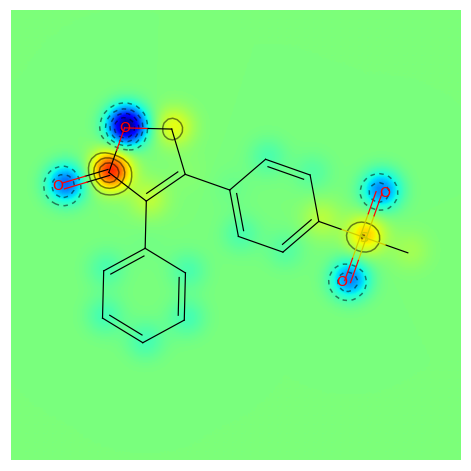

In [188]:
wrapping(5090)

In [339]:
def test_SMILES():
    assert type(CID)=="int","Wrong type of input CID"
    assert type(SMILES)=='function',"Wrong type of result, it should return a SMILES as a function"